In [2]:
import sqlite3
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis with Python

In [55]:
comments_df = pd.read_csv('comments.csv')
#comments_df.head()

In [56]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18409 non-null  int64  
 1   Video ID    18409 non-null  object 
 2   Comment     18408 non-null  object 
 3   Likes       18409 non-null  float64
 4   Sentiment   18409 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 719.2+ KB


In [57]:
comments_df[comments_df.Comment.isna()]

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
9745,9745,bvkk3UdlfA4,NaN,1.0,1.0


In [58]:
videos_stats_df = pd.read_csv('videos-stats.csv')
#videos_stats_df.head()

In [59]:
videos_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1881 non-null   int64  
 1   Title         1881 non-null   object 
 2   Video ID      1881 non-null   object 
 3   Published At  1881 non-null   object 
 4   Keyword       1881 non-null   object 
 5   Likes         1879 non-null   float64
 6   Comments      1879 non-null   float64
 7   Views         1879 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 117.7+ KB


In [60]:
videos_stats_df[videos_stats_df.Likes.isna()]

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1879,1879,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN
1880,1880,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN


In [86]:
videos_stats_df[videos_stats_df['Video ID'] == '0e3GPea1Tyg']

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1286,1286,"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,2021-11-24,mrbeast,14259033.0,611757.0,285526909.0


In [77]:
videos_stats_df['Video ID'].value_counts()

5q87K1WaoFI    2
7eh4d6sabA0    2
WBK2_lD7KGA    2
RFMi3v0TXP8    2
LeC5yJq4tsI    2
              ..
vZaxwblyWkU    1
Gm0VRaAqcOs    1
VBFvRLyvDqU    1
HG68Ymazo18    1
cyLWtMSry58    1
Name: Video ID, Length: 1869, dtype: int64

## Set up Sqlite Database

### Table : videos_stats

In [3]:
# Create connection and cursor object
conn = sqlite3.connect('YouTube_Stats.db')
cursor = conn.cursor()

In [90]:
# Create table from csv file
with open('videos-stats.csv', 'r') as file:
    reader = csv.reader(file)
    header_1 = next(reader)
    
    # add column name to first column
    if not header_1[0]:
        header_1[0] = 'Index'
    
    # replace space with _ in column names
    header_1 = [col.replace(' ', '_') for col in header_1]
    header_1[0] = f'"{header_1[0]}"'

    print(header_1)

    # create table with column names and data types
    create_table_query = f'''
        CREATE TABLE IF NOT EXISTS videos_stats (
            {header_1[0]} INTEGER PRIMARY KEY,
            {header_1[1]} TEXT,
            {header_1[2]} VARCHAR,
            {header_1[3]} DATE,
            {header_1[4]} VARCHAR,
            {header_1[5]} FLOAT,
            {header_1[6]} FLOAT,
            {header_1[7]} FLOAT
        )
    '''

    # execute query
    cursor.execute(create_table_query)

['"Index"', 'Title', 'Video_ID', 'Published_At', 'Keyword', 'Likes', 'Comments', 'Views']


In [91]:
# Input data from csv file
with open('videos-stats.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)

    # create strings for insert queries
    # concatenate column names with ', ' as separator
    columns = ', '.join(header_1)
    # concatenate len(header) of '?' with ', ' as separator
    question_marks = ', '.join(['?'] * len(header_1))

    # insert data
    for row in reader:
        insert_query = f'INSERT INTO videos_stats ({columns}) VALUES ({question_marks})'
        cursor.execute(insert_query, row)
    
    # commit changes
    conn.commit()

In [92]:
# Fill missing values in 'Likes', 'Comments', and 'Views' with 0's
columns_fill_na = [header_1[5], header_1[6], header_1[7]]
print(columns_fill_na)

for col in columns_fill_na:
    update_query = f'''
        UPDATE videos_stats
        SET {col} = 0.0
        WHERE {col} = ''
    '''

    cursor.execute(update_query)

conn.commit()

['Likes', 'Comments', 'Views']


In [93]:
# Print table
#cursor.execute('SELECT * FROM videos_stats')
cursor.execute('PRAGMA table_info(videos_stats)')
rows = cursor.fetchall()
for row in rows:
    print(row)

(0, 'Index', 'INTEGER', 0, None, 1)
(1, 'Title', 'TEXT', 0, None, 0)
(2, 'Video_ID', 'VARCHAR', 0, None, 0)
(3, 'Published_At', 'DATE', 0, None, 0)
(4, 'Keyword', 'VARCHAR', 0, None, 0)
(5, 'Likes', 'FLOAT', 0, None, 0)
(6, 'Comments', 'FLOAT', 0, None, 0)
(7, 'Views', 'FLOAT', 0, None, 0)


### Table : comments

In [94]:
# Create table from csv file
with open('comments.csv', 'r') as file:
    reader = csv.reader(file)
    header_2 = next(reader)
    
    # add column name to first column
    if not header_2[0]:
        header_2[0] = 'Index'
    
    # replace space with _ in column names
    header_2 = [col.replace(' ', '_') for col in header_2]
    header_2[0] = f'"{header_2[0]}"'

    # create table with column names and data types
    create_table_query = f'''
        CREATE TABLE IF NOT EXISTS comments (
            {header_2[0]} INTEGER,
            {header_2[1]} VARCHAR,
            {header_2[2]} TEXT,
            {header_2[3]} FLOAT,
            {header_2[4]} FLOAT,
            FOREIGN KEY ({header_2[1]}) REFERENCES videos_stats({header_2[1]})
        )
    '''

    # execute query
    cursor.execute(create_table_query)

In [95]:
# Input data from csv file
with open('comments.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)

    # create strings for insert queries
    # concatenate column names with ', ' as separator
    columns = ', '.join(header_2)
    # concatenate len(header) of '?' with ', ' as separator
    question_marks = ', '.join(['?'] * len(header_2))

    # insert data
    for row in reader:
        insert_query = f'INSERT INTO comments ({columns}) VALUES ({question_marks})'
        cursor.execute(insert_query, row)
    
    # commit changes
    conn.commit()

In [96]:
# Print table
#cursor.execute('SELECT * FROM comments')
cursor.execute('PRAGMA table_info(comments)')
rows = cursor.fetchall()
for row in rows:
    print(row)

(0, 'Index', 'INTEGER', 0, None, 0)
(1, 'Video_ID', 'VARCHAR', 0, None, 0)
(2, 'Comment', 'TEXT', 0, None, 0)
(3, 'Likes', 'FLOAT', 0, None, 0)
(4, 'Sentiment', 'FLOAT', 0, None, 0)


In [88]:
#cursor.execute('''
#    DROP TABLE IF EXISTS videos_stats
#''')
#cursor.execute('''
#    DROP TABLE IF EXISTS comments
#''')
#
#conn.commit()

In [70]:
#cursor.execute('''
#    SELECT * FROM videos_stats
#    WHERE Likes = ''
#''')
#
#missing = cursor.fetchall()
#for row in missing:
#    print(row)

## Exploratory Data Analysis with SQL

In [6]:
def sql_to_df(rows, header, style = False, stat = ''):
    if style:

        if not stat:
            return pd.DataFrame(rows, columns = header).style.format({
                'Likes' : '{:,.0f}',
                'Comments' : '{:,.0f}',
                'Views' : '{:,.0f}',
                'Sentiment' : '{:,.1f}'
            })
            
        else:
            multi_lv_header = [(stat, col) for col in header]
            return pd.DataFrame(rows, columns = pd.MultiIndex.from_tuples(multi_lv_header)).style.format({
                (stat, 'Likes') : '{:,.0f}',
                (stat, 'Comments') : '{:,.0f}',
                (stat, 'Views') : '{:,.0f}',
                (stat, 'Sentiment') : '{:,.2f}'
            })

    else:
        return pd.DataFrame(rows, columns = header)

In [82]:
# Most liked videos
cursor.execute('''
    SELECT
        *
    FROM 
        videos_stats
    ORDER BY
        Likes DESC
    LIMIT
        10
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

sql_to_df(rows, header, True)

,Index,Title,Video_ID,Published_At,Keyword,Likes,Comments,Views
0,557,El Chombo - Dame Tu Cosita feat. Cutty Ranks (Official Video) [Ultra Music],FzG4uDgje3M,2018-04-05,google,"16,445,558","732,818","4,034,122,271"
1,1286,"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,2021-11-24,mrbeast,"14,259,033","611,757","285,526,909"
2,1121,Martin Garrix - Animals (Official Video),gCYcHz2k5x0,2013-06-17,animals,"11,025,176","335,455","1,582,262,997"
3,752,Powfu - death bed (coffee for your head) (Official Video) ft. beabadoobee,jJPMnTXl63E,2020-04-01,bed,"7,786,057","195,769","524,709,805"
4,922,The Weeknd - Save Your Tears (Official Music Video),XXYlFuWEuKI,2021-01-05,music,"6,823,113","270,948","915,457,091"
5,1145,Glass Animals - Heat Waves (Official Video),mRD0-GxqHVo,2020-06-29,animals,"6,177,588","125,791","378,164,492"
6,1292,I Spent 50 Hours Buried Alive,9bqk6ZUsKyA,2021-03-27,mrbeast,"6,055,504","239,172","191,988,678"
7,1118,Maroon 5 - Animals (Official Music Video),qpgTC9MDx1o,2014-09-29,animals,"5,743,875","178,361","826,423,766"
8,659,"history of the entire world, i guess",xuCn8ux2gbs,2017-05-10,history,"5,471,653","395,657","147,339,243"
9,652,One Direction - History (Official Video),yjmp8CoZBIo,2016-01-26,history,"5,400,589","434,688","434,352,213"


In [28]:
# Most commented-upon videos
cursor.execute('''
    SELECT
        *
    FROM 
        videos_stats
    ORDER BY
        Comments DESC
    LIMIT
        10
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

sql_to_df(rows, header, True)

,Index,Title,Video_ID,Published_At,Keyword,Likes,Comments,Views
0,557,El Chombo - Dame Tu Cosita feat. Cutty Ranks (Official Video) [Ultra Music],FzG4uDgje3M,2018-04-05,google,"16,445,558","732,818","4,034,122,271"
1,1291,I Opened A Restaurant That Pays You To Eat At It,dg2Ag3e8W-Q,2020-12-19,mrbeast,"3,963,124","728,774","116,842,899"
2,1286,"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,2021-11-24,mrbeast,"14,259,033","611,757","285,526,909"
3,652,One Direction - History (Official Video),yjmp8CoZBIo,2016-01-26,history,"5,400,589","434,688","434,352,213"
4,659,"history of the entire world, i guess",xuCn8ux2gbs,2017-05-10,history,"5,471,653","395,657","147,339,243"
5,1121,Martin Garrix - Animals (Official Video),gCYcHz2k5x0,2013-06-17,animals,"11,025,176","335,455","1,582,262,997"
6,527,PIKOTARO - PPAP (Pen Pineapple Apple Pen) (Long Version) [Official Video],Ct6BUPvE2sM,2016-11-02,apple,"4,144,389","294,428","425,478,119"
7,922,The Weeknd - Save Your Tears (Official Music Video),XXYlFuWEuKI,2021-01-05,music,"6,823,113","270,948","915,457,091"
8,1292,I Spent 50 Hours Buried Alive,9bqk6ZUsKyA,2021-03-27,mrbeast,"6,055,504","239,172","191,988,678"
9,1280,"I Gave My 100,000,000th Subscriber An Island",2isYuQZMbdU,2022-08-04,mrbeast,"3,710,978","224,423","63,310,479"


In [29]:
# Most viewed videos
cursor.execute('''
    SELECT
        *
    FROM 
        videos_stats
    ORDER BY
        Views DESC
    LIMIT
        10
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

sql_to_df(rows, header, True)

,Index,Title,Video_ID,Published_At,Keyword,Likes,Comments,Views
0,557,El Chombo - Dame Tu Cosita feat. Cutty Ranks (Official Video) [Ultra Music],FzG4uDgje3M,2018-04-05,google,"16,445,558","732,818","4,034,122,271"
1,1121,Martin Garrix - Animals (Official Video),gCYcHz2k5x0,2013-06-17,animals,"11,025,176","335,455","1,582,262,997"
2,922,The Weeknd - Save Your Tears (Official Music Video),XXYlFuWEuKI,2021-01-05,music,"6,823,113","270,948","915,457,091"
3,1118,Maroon 5 - Animals (Official Music Video),qpgTC9MDx1o,2014-09-29,animals,"5,743,875","178,361","826,423,766"
4,752,Powfu - death bed (coffee for your head) (Official Video) ft. beabadoobee,jJPMnTXl63E,2020-04-01,bed,"7,786,057","195,769","524,709,805"
5,652,One Direction - History (Official Video),yjmp8CoZBIo,2016-01-26,history,"5,400,589","434,688","434,352,213"
6,527,PIKOTARO - PPAP (Pen Pineapple Apple Pen) (Long Version) [Official Video],Ct6BUPvE2sM,2016-11-02,apple,"4,144,389","294,428","425,478,119"
7,1145,Glass Animals - Heat Waves (Official Video),mRD0-GxqHVo,2020-06-29,animals,"6,177,588","125,791","378,164,492"
8,757,Young Money - Bed Rock (Official Music Video),Ha80ZaecGkQ,2009-12-16,bed,"1,430,457","84,188","321,977,550"
9,775,Rihanna - California King Bed,nhBorPm6JjQ,2011-05-07,bed,"1,171,433","61,344","308,501,014"


In [32]:
# Number of videos for each Keyword (category)
cursor.execute('''
    SELECT
        Keyword, 
        COUNT(Keyword) as Count
    FROM
        videos_stats
    GROUP BY
        Keyword
    ORDER BY
        Count DESC
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

videos_by_keyword_df = sql_to_df(rows, header)
# videos_by_keyword_df

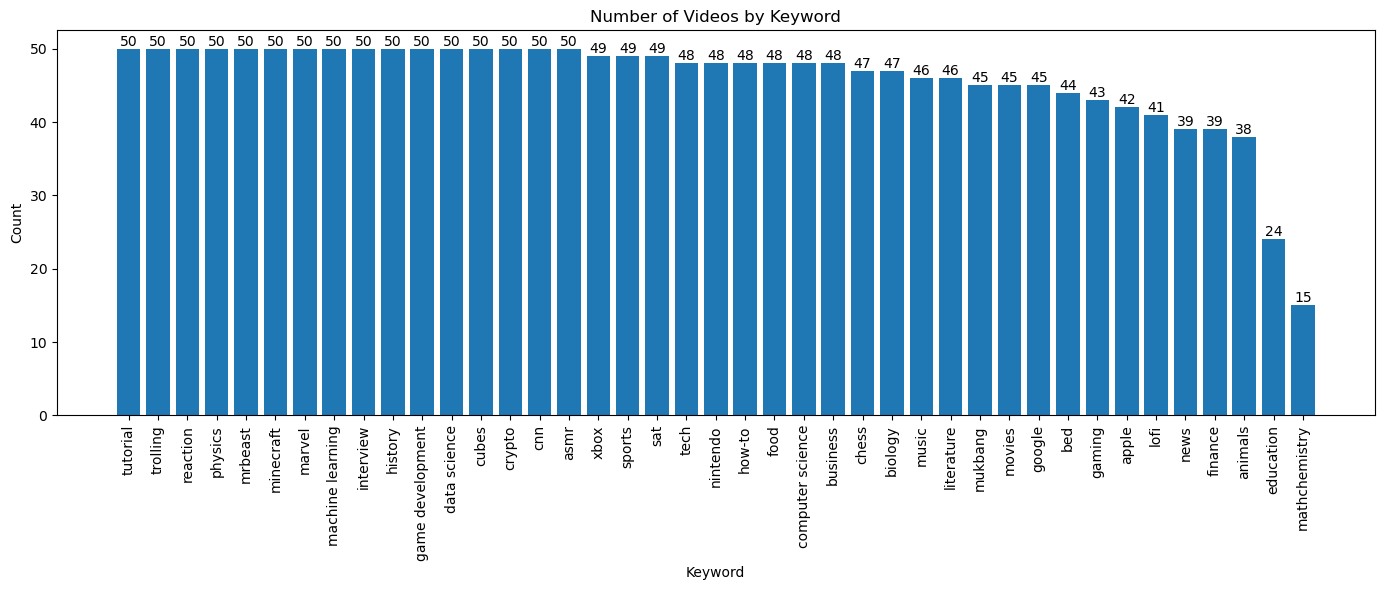

In [33]:
plt.figure(figsize = (17, 5))
plt.bar(videos_by_keyword_df['Keyword'], videos_by_keyword_df['Count'])
plt.xticks(rotation = 'vertical')

# add number on top of bars
for i, count in enumerate(videos_by_keyword_df['Count']):
    plt.text(i, count, str(count), ha = 'center', va = 'bottom')

plt.title('Number of Videos by Keyword')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.show()

In [84]:
# Total views, likes, and comments for each Keyword (category)
cursor.execute('''
    SELECT 
        Keyword,
        SUM(Views) as Views,
        SUM(Likes) as Likes,
        SUM(Comments) as Comments
    FROM
        videos_stats
    GROUP BY
        Keyword
    ORDER BY
        Views DESC,
        Likes DESC,
        Comments DESC
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

stats_total_df = sql_to_df(rows, header, True, 'TOTAL')
stats_total_df

In [80]:
# Average views, likes, and comments for each Keyword (category)
cursor.execute('''
    SELECT 
        Keyword,
        AVG(Views) as Views,
        AVG(Likes) as Likes,
        AVG(Comments) as Comments
    FROM
        videos_stats
    GROUP BY
        Keyword
    ORDER BY
        Views DESC,
        Likes DESC,
        Comments DESC
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

stats_average_df = sql_to_df(rows, header, True, 'AVERAGE')
stats_average_df

In [14]:
# Most liked comments
cursor.execute('''
    SELECT
        videos_stats.Title,
        comments.Video_ID,
        comments.Comment,
        comments.Likes,
        comments.Sentiment
    FROM
        comments
    INNER JOIN
        videos_stats ON comments.Video_ID = videos_stats.Video_ID
    ORDER BY
        comments.Likes DESC
    LIMIT
        15
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

sql_to_df(rows, header, True)

,Title,Video_ID,Comment,Likes,Sentiment
0,"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,"Like I said in the video, subscribe if you haven’t already and you could win $10,000!","891,372",2.0
1,"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,"Huge props to the set designers, everything was spot on!","469,175",2.0
2,"$456,000 Squid Game In Real Life!",0e3GPea1Tyg,"This is insanity, never done before in the history of this platform. Hats off to you Jimmy 👏","378,181",0.0
3,I Spent 50 Hours Buried Alive,9bqk6ZUsKyA,"Like I said in the video, subscribe if you haven’t already and you could win $10,000!","268,266",2.0
4,24 Hours In The Most Haunted Place On Earth,YyhKdOCwD7s,Subscribe and i'll give you a car,"260,871",1.0
5,"Going Through The Same Drive Thru 1,000 Times",QxGVgXf_LNk,Subscribe or I’ll drop kick you -me 2019,"232,310",0.0
6,"I Bought The World's Largest Firework ($600,000)",erQ_9yEz0ls,Subscribe or you’ll have bad luck,"218,435",0.0
7,I Opened A Restaurant That Pays You To Eat At It,dg2Ag3e8W-Q,Mrbeast doesnt go to the bank to get money. The bank goes to Mrbeast to withdraw money..,"195,704",1.0
8,I Spent 50 Hours Buried Alive,9bqk6ZUsKyA,imagine just randomly digging in that area and finding mrbeast lying in there with bottles of piss,"181,924",0.0
9,1 A.M Study Session 📚 - [lofi hip hop/chill beats],lTRiuFIWV54,I am here to proudly announce that it is 3am and I have finished all of my homework,"180,576",2.0


In [21]:
# Like/View ratio by video
cursor.execute('''
    SELECT
        "Index",
        Title,
        Published_At,
        Keyword,
        (Likes / Views) AS Likes_Views_ratio
    FROM
        videos_stats
    ORDER BY
        Likes_Views_ratio DESC
    LIMIT
        15
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

sql_to_df(rows, header, True)

,Index,Title,Published_At,Keyword,Likes_Views_ratio
0,1174,"Education should be a right for all, not a privilege for the few.",2022-08-24,education,0.218575
1,99,🔥Artistic Music Mix 2022: Top 50 Songs ♫ Best NCS Gaming Music ♫ Best Of EDM Remixes 2022,2022-08-24,gaming,0.208312
2,116,اصعب لعبة جوال تخليك تعصب ضحك وتحشيش,2022-08-22,gaming,0.173425
3,470,Elefante38 IMPRESSIONA SUPER GM!,2022-08-24,chess,0.164214
4,115,Gaming Memes Only True Gamers Understand 84 #Memes #shorts,2022-08-23,gaming,0.161814
5,108,🔴SHORT STREAM OR WHAT??😱| BGMI LIVE,2022-08-24,gaming,0.161022
6,1062,NO MORE A FAMILY FRIENDLY VLOGGER | LAKSHAY CHAUDHARY,2022-08-23,reaction,0.160880
7,110,Mylta Power Station Long drive & Night Food Party Vlog | RON GAMING VLOGS,2022-08-23,gaming,0.158420
8,1112,"Chạnh Lòng Thương Cô Lofi, Thằng Hầu Lofi, Đào Nương Lofi | Những Bản Lofi Chill Tâm Trạng 2022",2022-08-24,lofi,0.155794
9,696,HOW THE WORLD TURNED ON THIS DAY #royalfamily #history #popculture,2022-08-23,history,0.154669


In [19]:
# Comment/View ratio by video
cursor.execute('''
    SELECT
        "Index",
        Title,
        Published_At,
        Keyword,
        (Comments / Views) AS Comments_Views_ratio
    FROM
        videos_stats
    ORDER BY
        Comments_Views_ratio DESC
    LIMIT
        15
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

sql_to_df(rows, header, True)

,Index,Title,Published_At,Keyword,Comments_Views_ratio
0,409,🔴 URGENT Bitcoin Shocking Trend for Big Profit | Crypto News Today,2022-08-23,crypto,0.083422
1,379,THIS WILL SHOCK EVERYONE!!!!!,2022-08-24,crypto,0.066808
2,374,"Rep. Boebert skips crypto reporting cutoff, and cutting emissions with blockchain: CNBC Crypto World",2022-08-24,crypto,0.066584
3,391,Raoul Pal Update: Time Is Running Out & Crypto Will Not Recover Untill It Happens,2022-08-24,crypto,0.064975
4,1619,Xbox Gamepass Continue to Deliver Great Content and Playstation Fanboys Continue to Hate it,2022-08-24,xbox,0.064560
5,1590,"Xbox just said ""Console Exclusives are DOOMED"" but will PlayStation AGREE?",2022-08-24,xbox,0.058446
6,410,Urgent! If You Hold ANY Crypto WATCH NOW! Terra Luna Classic Recovery!,2022-08-23,crypto,0.055381
7,55,Biden Announces Plan For Federal Student Loan Debt Relief,2022-08-24,news,0.052037
8,1628,Sony PlayStation is PAYING for Games NOT to go on Xbox Game Pass?!,2022-08-11,xbox,0.051891
9,377,BITCOIN BREAKOUT IN 48 HOURS!!!!! I'M SHAKING!!!!!,2022-08-23,crypto,0.048305


In [24]:
# Like/View ratio by keyword (category)
cursor.execute('''
    SELECT
        Keyword,
        SUM(Likes) / SUM(Views) AS Likes_Views_ratio
    FROM
        videos_stats
    GROUP BY
        Keyword
    ORDER BY
        Likes_Views_ratio DESC
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

sql_to_df(rows, header, True)

,Keyword,Likes_Views_ratio
0,reaction,0.118683
1,gaming,0.047912
2,trolling,0.043226
3,game development,0.036124
4,minecraft,0.033749
5,marvel,0.031808
6,tech,0.031548
7,mrbeast,0.031543
8,data science,0.031528
9,sat,0.029113


In [25]:
# Comment/View ratio by keyword (category)
cursor.execute('''
    SELECT
        Keyword,
        SUM(Comments) / SUM(Views) AS Comments_Views_ratio
    FROM
        videos_stats
    GROUP BY
        Keyword
    ORDER BY
        Comments_Views_ratio DESC
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

sql_to_df(rows, header, True)

,Keyword,Comments_Views_ratio
0,cnn,0.013667
1,reaction,0.005210
2,news,0.004782
3,gaming,0.002650
4,nintendo,0.002219
5,trolling,0.002152
6,sat,0.001902
7,game development,0.001899
8,interview,0.001830
9,xbox,0.001685


In [7]:
# Average sentiment score
cursor.execute('''
    SELECT
        Keyword,
        AVG(comments.Sentiment) AS Sentiment
    FROM
        videos_stats
    INNER JOIN 
        comments ON comments.Video_ID = videos_stats.Video_ID
    GROUP BY
        Keyword
    ORDER BY
        Sentiment DESC
''')
rows = cursor.fetchall()
header = [col[0] for col in cursor.description]

sql_to_df(rows, header, True, 'AVERAGE')

In [21]:
cursor.close()
conn.close()